# HEALTHCARE COST PREDICTION

# 1. Introduction 

Healthcare is one of the important things in our life. Healthcare expense is the concern of not only any invidual but also related agencies (healthcare organizations, insurance companies, government...). In order to deal with the rising cost of healthcare, we all need a suitable financial approach. This is the analysis of dataset on healthcare cost covered by insurance programs across US in 2017. 

The analysis aims to answer following questions:
1. Which features affecting to healthcare cost?
2. Can we predict healthcare cost? 
3. what are the suggestions from these findings? 


# 2. Exploratory Data Analysis

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# Get the Data

I work with the Insurance csv file from https://www.kaggle.com/mirichoi0218/insurance. There are 7 variables in this dataset, including: age, sex, bmi, children, smoker, rigion and charges. These variables are defined as:

age: insurance contractor age, years

sex: insurance contractor gender, [female, male]

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective 
index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: number of children covered by health insurance / Number of dependents

Smoker: smoking, [yes, no]

Region: the beneficiary’s residential area in the US, [northeast, southeast, southwest, northwest]

Charges: Individual medical costs billed by health insurance



### In order to solve problems mentioned above, 'charges' was used as the label. The rest of variables were considered as features. Then the model was built to predict healthcare cost. 

In [3]:
cost=pd.read_csv('C:/Users/DUNGNPT/Desktop/ML/FinalProject/insurance.csv')

In [4]:
cost.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 57.5+ KB


# There was 1338 observations with 7 variables in this dataset. And there was no missing values.

In [6]:
cost.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Data Visualization 

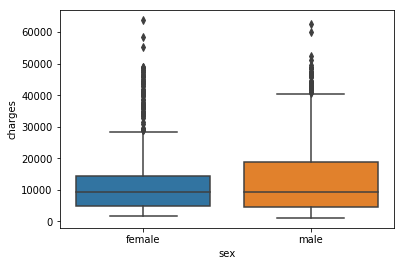

In [7]:
#charges by sex
sns.boxplot(x="sex", y="charges", data=cost)

There was no differences of charges between female and male

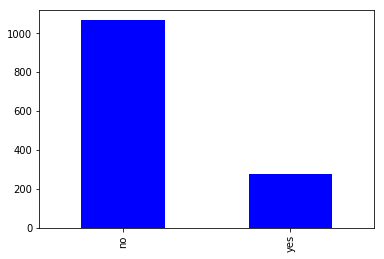

In [8]:
counts = cost['smoker'].value_counts() 
counts.plot.bar(color = 'blue', grid=False) 

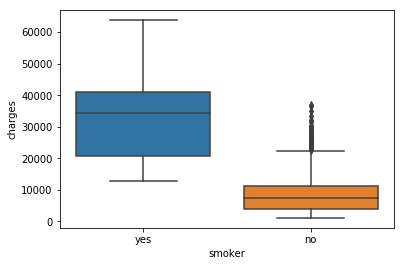

In [9]:
#smoker vs charges
sns.boxplot(x="smoker", y="charges", data=cost)

Smokers have more charges than non-smoker

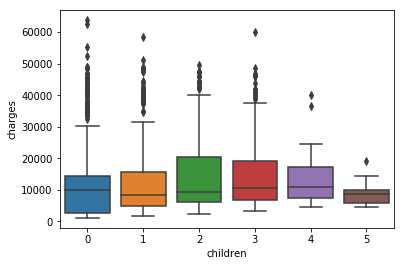

In [10]:
# children vs charges
sns.boxplot(x="children", y="charges", data=cost)

Charges for insurance with 4-5 chilren covered seems to go down. The plot also shows lower number of observations with 5 children covered by health insurance compared to other groups.

D:\SOFTWARES\New folder\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


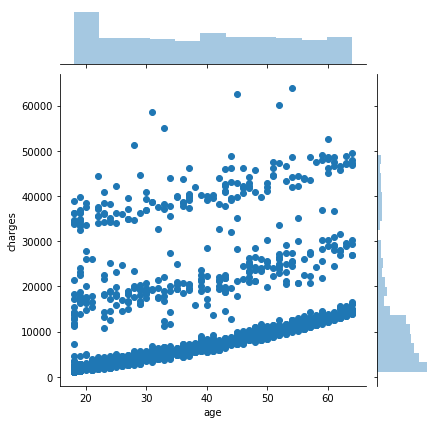

In [11]:
# age vs charges
sns.jointplot(x='age',y='charges',data=cost)

When age go up Charges for health insurance also trends up

D:\SOFTWARES\New folder\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


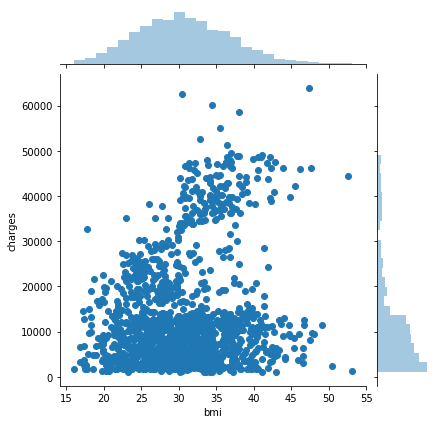

In [12]:
# bmi vs charges
sns.jointplot(x='bmi',y='charges',data=cost)

When BMI go up Charges for health insurance also trends up

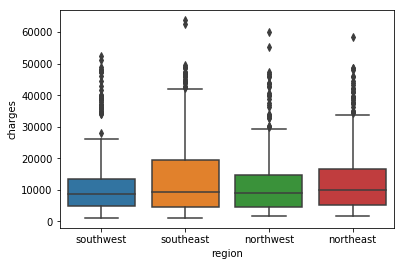

In [13]:
sns.boxplot(x="region", y="charges", data=cost)

There is no differences of charges among regions

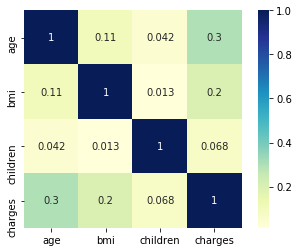

In [14]:
sns.heatmap(cost.corr(), annot=True, cmap="YlGnBu", square=True)

In [15]:
cost_edit = pd.get_dummies(cost, columns=['sex'], drop_first=True)

In [16]:
cost_edit.head()

,age,bmi,children,smoker,region,charges,sex_male
0,19,27.900,0,yes,southwest,16884.92400,0
1,18,33.770,1,no,southeast,1725.55230,1
2,28,33.000,3,no,southeast,4449.46200,1
3,33,22.705,0,no,northwest,21984.47061,1
4,32,28.880,0,no,northwest,3866.85520,1


In [17]:
cost_final=pd.get_dummies(cost_edit, columns=['smoker'], drop_first=True)

In [18]:
cost_final.head()

,age,bmi,children,region,charges,sex_male,smoker_yes
0,19,27.900,0,southwest,16884.92400,0,1
1,18,33.770,1,southeast,1725.55230,1,0
2,28,33.000,3,southeast,4449.46200,1,0
3,33,22.705,0,northwest,21984.47061,1,0
4,32,28.880,0,northwest,3866.85520,1,0


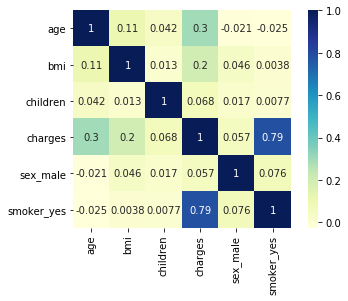

In [19]:
sns.heatmap(cost_final.corr(), annot=True, cmap="YlGnBu", square=True)

'smoker' is the most correlated to charges (R=0.79). While 'sex' and 'region' are weak correlated compared to charges. therefore, 'sex' and 'region' were excluded when building the predicting model for healthcare cost.

# 3. Build and Evaluate Model

## 3.1 Create model

In [20]:
x = cost_final[["age", "bmi","smoker_yes"]]
y= cost_final['charges']

In [21]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

D:\SOFTWARES\New folder\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# 3.2 Train model

In [22]:
x_train = x_train.sort_index()
y_train = y_train.sort_index()

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
charges = LinearRegression()

In [25]:
charges.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
print(charges.fit(x_train,y_train).coef_)

[  243.37575572   354.87195555 23469.73560219]


# 3.3 Predicting Test Data

In [27]:
y_test_predict = charges.predict(x_test)

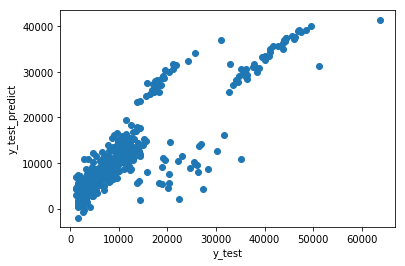

In [28]:
plt.scatter(y_test, y_test_predict)
plt.xlabel("y_test")
plt.ylabel("y_test_predict")
plt.show()

# 3.4 Evaluate model

In [35]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

MAE: 4046.9883522195673
MSE: 33942226.593778715
RMSE: 5825.995759849016


D:\SOFTWARES\New folder\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


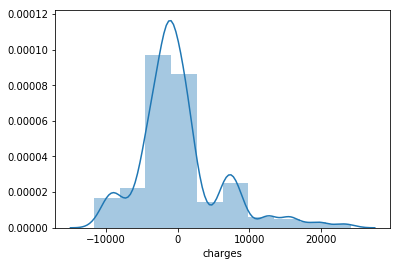

In [36]:
residuals = y_test-y_test_predict
sns.distplot(residuals,bins=10)

Histogram of residuals looks normally distributed.So, the model is quite good with good fit.

# 4. Further Investigate

In [31]:
Coeffecient=print('Coeffecient=',charges.fit(x_train,y_train).coef_)

Coeffecient= [  243.37575572   354.87195555 23469.73560219]


In [32]:
Coeffecient_dic = {
    'Coeffecient': [  243.37575572,   354.87195555, 23469.73560219],
}
columns = ['Coeffecient']
index = ['age', 'bmi','smoker_yes']
df = pd.DataFrame(Coeffecient_dic, columns=columns, index=index)
df

,Coeffecient
age,243.375756
bmi,354.871956
smoker_yes,23469.735602


Interpreting the coefficients:

Holding all other features fixed, a 1 unit increase in age. charges is associated with an increase of 243.37 total dollars spent.
Holding all other features fixed, a 1 unit increase in bmi is associated with an increase of 345.87 total dollars spent.
Holding all other features fixed, smoker is associated with an increase of 23,469.73 total dollars spent.

In [37]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# 5. Conclusions

'smoker','age' and 'bmi' are features affecting to healthcare cost charged by insurance. in which, smoker is the most affected features to charges.

we can use the model to predict healthcare cost charged by insurance

input new data to predict healthcare cost charged by insurance. For example: A is 30 years old and non-smoker with bmi=24.5. How much is healthcare cost charged by insurance for A? 